In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('data/simpsons_script_lines.csv', error_bad_lines = False)

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [3]:
data

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0
5,9554,32,214,Martin Prince: (HOARSE WHISPER) I don't think ...,877000,True,38,3.0,Martin Prince,Springfield Elementary School,I don't think there's anything left to say.,i dont think theres anything left to say,8.0
6,9555,32,215,Edna Krabappel-Flanders: Bart?,881000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,Bart?,bart,1.0
7,9556,32,216,Bart Simpson: Victory party under the slide!,882000,True,8,3.0,Bart Simpson,Springfield Elementary School,Victory party under the slide!,victory party under the slide,5.0
8,9557,32,217,(Apartment Building: Ext. apartment building -...,889000,False,NaN,374.0,NaN,Apartment Building,NaN,NaN,NaN
9,9558,32,218,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...,889000,True,9,374.0,Lisa Simpson,Apartment Building,Mr. Bergstrom! Mr. Bergstrom!,mr bergstrom mr bergstrom,4.0


In [4]:
data.shape

(158248, 13)

In [5]:
data[:50000].to_csv('data/simpsons_abridged.csv', index=False)

In [6]:
data_spoken = data[['raw_character_text','normalized_text']]


In [38]:
data_bart = pd.DataFrame(data_spoken[data_spoken['raw_character_text'] == 'Bart Simpson'])
data_bart

,raw_character_text,normalized_text
7,Bart Simpson,victory party under the slide
17,Bart Simpson,hey thanks for your vote man
19,Bart Simpson,well you got that right thanks for your vote g...
21,Bart Simpson,well dont sweat it just so long as a couple of...
23,Bart Simpson,lewis
24,Bart Simpson,somebody must have voted
26,Bart Simpson,uh oh
27,Bart Simpson,NaN
30,Bart Simpson,i demand a recount
32,Bart Simpson,no


In [8]:
data_bart['text_type'] = data_bart['normalized_text'].map(lambda x: type(x))

In [9]:
 data_bart.text_type.value_counts()

<class 'str'>      13010
<class 'float'>      766
Name: text_type, dtype: int64

In [10]:
data_bart.dropna(inplace = True)

In [18]:
data_bart[data_bart['raw_character_text'] == 'Bart Simpson'].shape

(13010, 3)

In [19]:
data_bart.shape

(13010, 3)

Bart Simpson


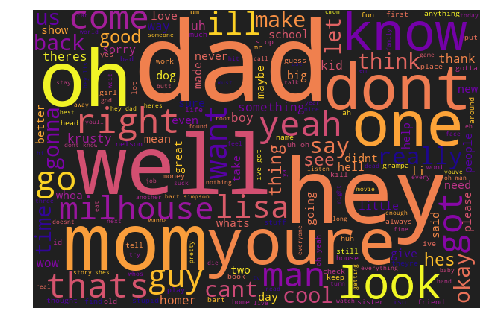

In [37]:
#colormap values are viridis, plasma, magma, inferno

from nltk.corpus import stopwords
stops = stopwords.words('english') + ['im','nan']
def visualize(label,df):
    print(label)
    words = ''
    for msg in df[df['raw_character_text'] == label]['normalized_text']:
        msg = msg.split(' ')
        keep = [w for w in msg if w not in stops]
        keep = ' '.join(keep)
        words = words + ' ' + keep 
       
    wordcloud = WordCloud(width=600, height=400,background_color = '#202020',colormap='plasma').generate(words)
    plt.figure(figsize=(8,8),facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('Bart Simpson',data_bart)

In [82]:
d = ' '.join(['hey','dude'])

In [83]:
d.split(" ")

['hey', 'dude']